#Project-2:

**Objective:** Implement a machine learning pipeline that involves loading a dataset, preprocessing the data, performing feature selection (optional), tuning hyperparameters, applying k-fold cross-validation, training a model, and evaluating its performance using either a Naive Bayes or K-Nearest Neighbors (KNN) classifier.

#Dataset Loading & Preprocessing

In [ ]:
# Read the dataset
import pandas as pd
original_dataset = pd.read_csv('/content/diabetes.csv')
df = original_dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Describing the dataset, i.e., showing count, mean, standard deviation, quartiles, min, max of the dataset columns.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Standardizing the features to have zero mean and unit variance:

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(df)

# Convert the scaled data back into a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

# Output the scaled DataFrame
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.365896
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,-0.732120
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.365896
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,-0.732120
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.365896


Chi-Square doesn't support negative values in features. So we will use Min-Max Normalization.

In [ ]:
# Min-Max Normalization
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = df.iloc[:, :-1]

min_max = MinMaxScaler()
scaled_min_max = min_max.fit_transform(data)

normalized_data = pd.DataFrame(scaled_min_max)
normalized_data[:4]

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000


In [ ]:
# Assigning column names to the normalized dataset
normalized_data.columns = ['Pregnancies',	'Glucose',	'BloodPressure', 'SkinThickness',	'Insulin',	'BMI',	'DiabetesPedigreeFunction',	'Age']
normalized_data[:4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000


In [ ]:
# Adding target feature to the normalized data
import pandas as pd
d=df.iloc[:, -1]
d=pd.DataFrame(d,columns =['Outcome'])
result_data = normalized_data.join(d)
result_data[:4]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0


# Feature Selection (Chi-Square)

In [ ]:
# With Normalization
from sklearn.feature_selection import SelectKBest, chi2
from numpy import array

# Split data into features and target variable
x= result_data.iloc[:,:-1]
y= result_data["Outcome"]

select = SelectKBest(score_func=chi2, k=3)

# Fit select to training data
z = select.fit_transform(x,y)

filter = select.get_support()

feat_labels=df.iloc[:,:-1].columns

features = array(feat_labels)
print("All features:")
print(features)

# Get names of selected features
print("\nSelected best 3 features:")
print(features[filter])

All features:
['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']

Selected best 3 features:
['Pregnancies' 'Glucose' 'Age']


#Feature Selection (SelectKBest)

In [ ]:
# With Normalization
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Split data into features and target variable
y = result_data['Outcome']
X = result_data.drop('Outcome', axis=1)

selector = SelectKBest(score_func=f_classif, k=3)

# Fit selector to training data
X_selected = selector.fit_transform(X, y)
selected_indices = selector.get_support(indices=True)

# Get names of selected features
selected_features = X.columns[selected_indices]
print("Selected 3 features:", selected_features)

Selected 3 features: Index(['Glucose', 'BMI', 'Age'], dtype='object')


<Axes: >

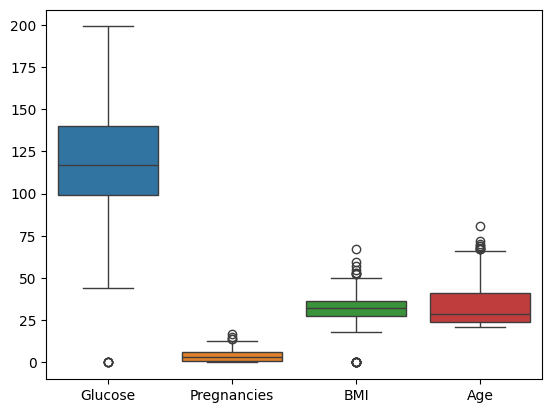

In [ ]:
# Box Plot for identifying outliers from both feature selection results
import seaborn as sns
sns.boxplot(df[['Glucose', 'Pregnancies', 'BMI', 'Age']])

#Hyperparameter Tuning

In [ ]:
# Split data
from sklearn.model_selection import train_test_split

X =df.iloc[:, :-1]
y=df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using KNN for Hyperparameter Tuning:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

# KNN model
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 9}
Best score:  0.7443422630947621


Using Naive Bayes for Hyperparameter Tuning:

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB

# Bernoulli Naive Bayes
model = BernoulliNB()

param_bnb={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000,10000]}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_bnb, cv=5, n_jobs=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Grid Search Best Parameters:", grid_search.best_params_)
print("Grid Search Best Score:", grid_search.best_score_)

Grid Search Best Parameters: {'alpha': 1000}
Grid Search Best Score: 0.6530987604958016


# Stratified K-Fold Cross-Validation



In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np

# Split data into features and target variable
X =result_data.iloc[:, :-1]
X=X.values
y=result_data['Outcome']
y=y.values

knn = KNeighborsClassifier(n_neighbors=9)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = []

# Split and train model
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

average_score = np.mean(scores)
print(f"Average Accuracy: {average_score:.3f}")

Average Accuracy: 0.741


#Training and Testing & Model Evaluation:

From above codes, we can see that KNN is better in terms of hyperparameter tuning.

In [ ]:
# defining classification model evaluation metrics
from sklearn.metrics import accuracy_score, precision_score
def evaluation_analysis(true_label,predicted):

# Compute accuracy, precision
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='macro')

  print(f"Accuracy: {accuracy:.3f}")
  print(f"Precision (macro): {precision:.3f}")

KNN Classifier:

Accuracy: 0.766
Precision (macro): 0.750

Confusion Matrix:
 [[86 13]
 [23 32]]


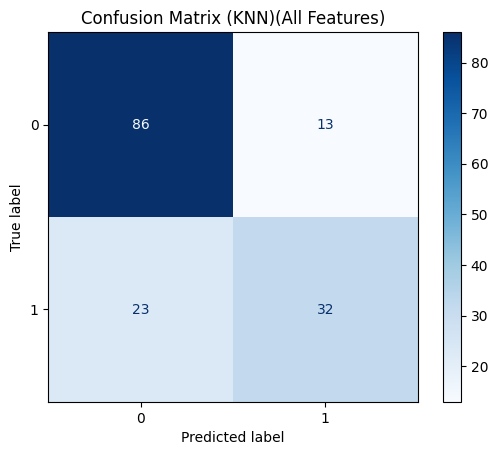

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Using all the columns for classifier without normalization
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Confusion matrix target label names
target_names = {0: '0', 1: '1'}
display_labels = [target_names[label] for label in sorted(target_names)]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn.predict(X_test)

# Compute accuracy, precision
evaluation_analysis(y_test,y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Display the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (KNN)(All Features)')
plt.show()

KNN Classifier (With Selected Features from Chi-Square):

Accuracy: 0.753
Precision (macro): 0.739

Confusion Matrix:
 [[87 12]
 [26 29]]


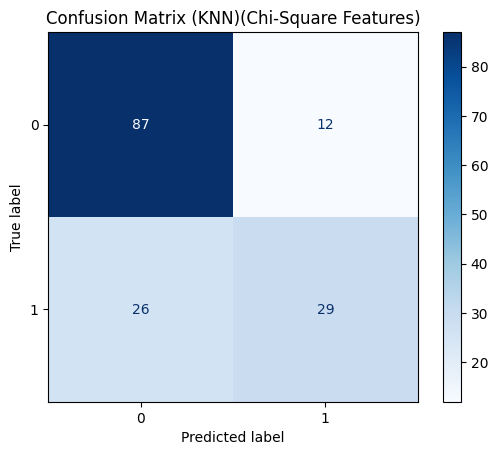

In [ ]:
# Using all the columns for classifier with normalization
X = result_data[['Pregnancies','Glucose', 'Age']]
y = result_data['Outcome']

# Confusion matrix target label names
target_names = {0: '0', 1: '1'}
display_labels = [target_names[label] for label in sorted(target_names)]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn.predict(X_test)

# Compute accuracy, precision
evaluation_analysis(y_test,y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Display the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (KNN)(Chi-Square Features)')
plt.show()

KNN Classifier (With Selected Features from SelectKBest):

Accuracy: 0.766
Precision (macro): 0.747

Confusion Matrix:
 [[84 15]
 [21 34]]


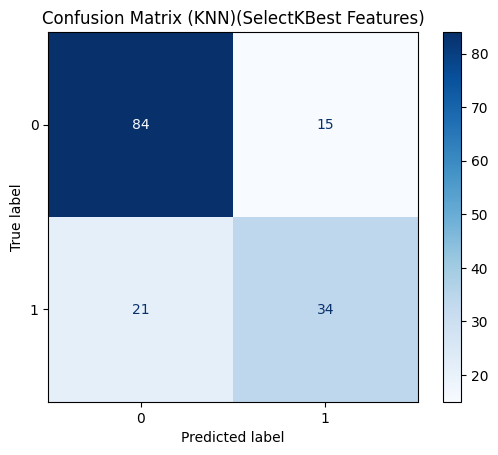

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Using all the columns for classifier without normalization
X = df[['Glucose', 'BMI', 'Age']]
y = df['Outcome']

# Confusion matrix target label names
target_names = {0: '0', 1: '1'}
display_labels = [target_names[label] for label in sorted(target_names)]

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn.predict(X_test)

# Compute accuracy, precision
evaluation_analysis(y_test,y_pred)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Display the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = display_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (KNN)(SelectKBest Features)')
plt.show()